In [2]:
# SVM
import numpy as np
from sklearn import datasets    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 使用SVM拟合模型
X = iris["data"][:, (2, 3)]  # 使X为花瓣长度和宽度
y = (iris["target"] == 2).astype(np.float64)  # 使y为Iris-Virginica
svm_clf = Pipeline([    # 使用Pipeline将StandardScaler和LinearSVC连接起来
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
# 预测
svm_clf.predict([[5.5, 1.7]])

array([1.])

d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change

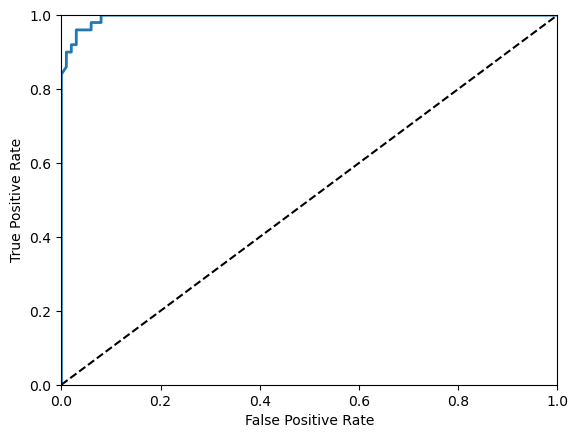

0.9951

In [9]:
#对预测效果进行评价
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X, y, cv=3, scoring="accuracy")
#使用混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(svm_clf, X, y, cv=3)   
confusion_matrix(y, y_pred)
#计算精度和召回率
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_pred)
recall_score(y, y_pred)
#计算F1分数
from sklearn.metrics import f1_score
f1_score(y, y_pred)
#使用ROC曲线
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(svm_clf, X, y, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)
#绘制ROC曲线
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#计算AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)






In [10]:
# 非线性SVM分类
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15) # 生成非线性数据
polynomial_svm_clf = Pipeline([     # 使用Pipeline将PolynomialFeatures和StandardScaler和LinearSVC连接起来   
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)


d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

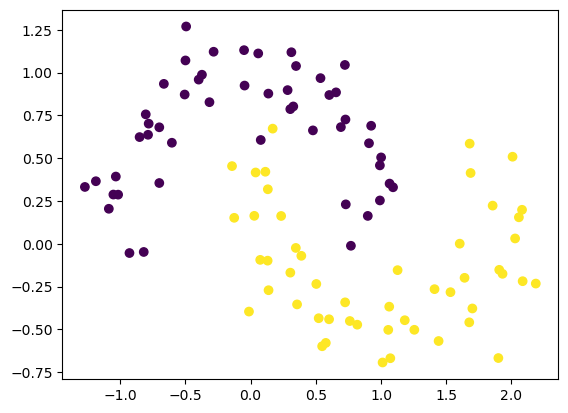

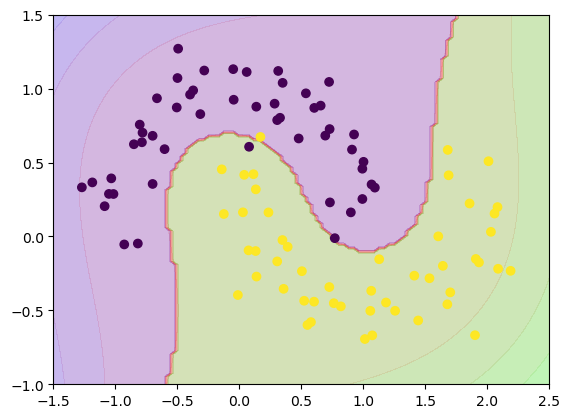

In [11]:

#  多项式核技巧添加多项式特征
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([    # 使用Pipeline将StandardScaler和SVC连接起来
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)
# 绘图
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
# 模型拟合效果绘图
def plot_predictions(clf, axes):  # 绘制模型拟合效
    x0s = np.linspace(axes[0], axes[1], 100) # 生成100个点
    x1s = np.linspace(axes[2], axes[3], 100) # 生成100个点
    x0, x1 = np.meshgrid(x0s, x1s) # 生成网格
    X = np.c_[x0.ravel(), x1.ravel()] # 将网格拉直
    y_pred = clf.predict(X).reshape(x0.shape) # 预测
    y_decision = clf.decision_function(X).reshape(x0.shape) # 计算决策函数
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) # 绘制等高线
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # 绘制等高线
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5]) # 绘制模型拟合效果
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()


In [12]:
# 多项式内核SVM超参数的参数寻优
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'degree': [1, 2, 3, 4, 5], 'coef0': [0, 0.1, 0.5, 1, 2, 5, 10,100] ,  'C': [0.1, 0.5, 1, 2, 5, 10, 100]} ]
poly_kernel_svm_clf = SVC(kernel="poly", C=5)
grid_search = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)
grid_search.best_params_


{'C': 5, 'coef0': 0.5, 'degree': 3}

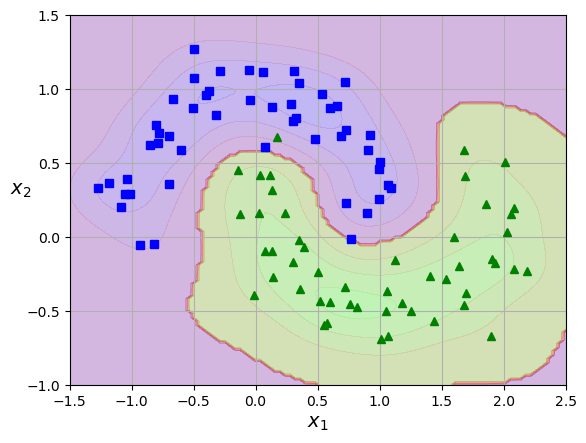

In [13]:
# 相似特征核技巧
# 高斯RBF核函数
rbf_kernel_svm_clf = Pipeline([    # 使用Pipeline将StandardScaler和SVC连接起来
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)    # 训练
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])    # 绘制预测结果

# 定义plot_dataset函数
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])    # 绘制数据集
plt.show()    # 显示图像


d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


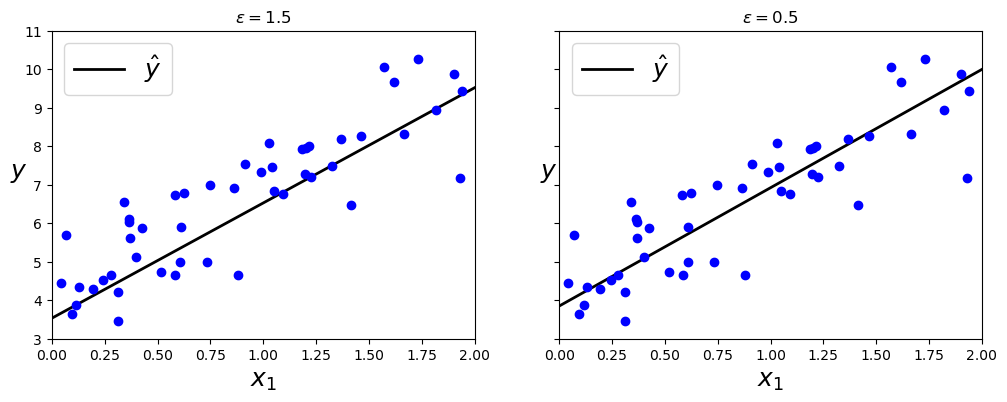

In [37]:
# SVM回归
from sklearn.svm import LinearSVR

# 定义plot_svm_regression函数
def plot_svm_regression(svm_reg, X, y, axes):
	x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1) # 生成100个点
	y_pred = svm_reg.predict(x1s) # 预测
	plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") # 绘制预测结果
	plt.plot(X, y, "bo") # 绘制训练集
	plt.axis(axes)  # 设置坐标轴范围
	plt.xlabel(r"$x_1$", fontsize=18) # 设置x轴标签
	plt.ylabel(r"$y$", fontsize=18, rotation=0) # 设置y轴标签
	plt.legend(loc="upper left", fontsize=18) # 设置图例位置

# 使用随机线性数据LinearSVR进行回归
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)    # 生成50个随机数
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()    # 生成50个随机数

# 定义并训练两个LinearSVR模型
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

#训练并可视化  （一行两列）  
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0]) # 选择第一个子图 
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon=1.5$")
plt.sca(axes[1]) # 选择第二个子图   
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon=0.5$")
plt.show()





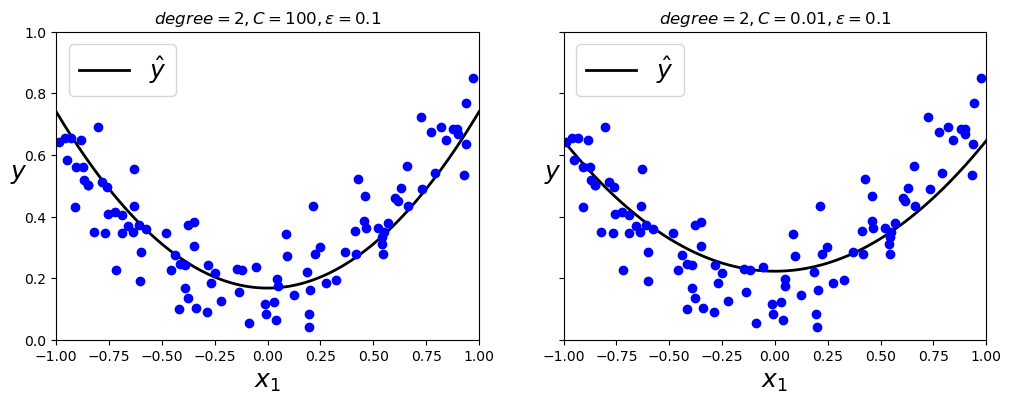

In [38]:
# 核技巧的SVM回归
from sklearn.svm import SVR

# 使用SVR对随机二次数据进行回归
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1    # 生成100个随机数
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()    # 生成100个随机数

# 定义并训练两个SVR模型
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

#训练并可视化  （一行两列）
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0]) # 选择第一个子图
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon))
plt.sca(axes[1]) # 选择第二个子图
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon))
plt.show()

